<a href="https://colab.research.google.com/github/DeborshiLahiri/DeborshiLahiri/blob/main/Hackerthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from google.colab import files
import io
u = files.upload()
a= pd.read_csv(io.BytesIO(u['Training Data.csv']))
b= pd.read_csv(io.BytesIO(u['Test Data.csv']))
c= pd.read_csv(io.BytesIO(u['click_log.csv']))

Saving Training Data.csv to Training Data.csv
Saving Test Data.csv to Test Data.csv
Saving click_log.csv to click_log.csv


In [ ]:
b["conversion_fraud"]=True
a["imprID"]=c["imprId"]
b["imprID"]=""
x=0
for i in range(965,1420):
  b.at[x,"imprID"]=c.at[i,"imprId"]
  x=x+1

In [ ]:
def build_model(my_learning_rate):
   model = tf.keras.models.Sequential()
   model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
   model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
   return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size):
    history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse   
print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
from matplotlib import pyplot as plt
def plot_the_model(trained_weight, trained_bias, feature, label):
  plt.xlabel(feature)
  plt.ylabel(label)
  random_examples = a.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()
def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 1430824.6250 - root_mean_squared_error: 1196.1708
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 1208746.5000 - root_mean_squared_error: 1099.4301
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 1059202.7500 - root_mean_squared_error: 1029.1758
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 929747.1875 - root_mean_squared_error: 964.2340
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 811520.7500 - root_mean_squared_error: 900.8445
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 705175.6875 - root_mean_squared_error: 839.7474
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 610167.2500 - root_mean_squared_error: 781.1320
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 520235.5625 - root_mean_squared_error: 721.2736
Epoch 9/100
7/7 [=========================

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


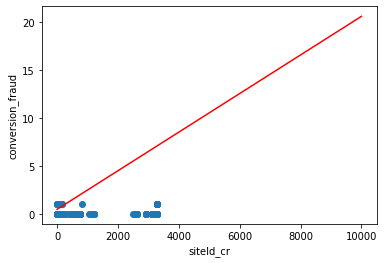

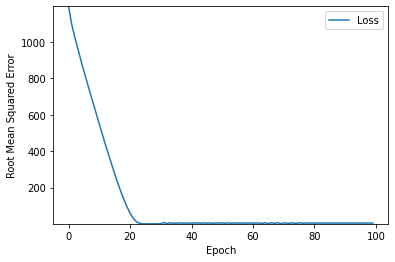

In [ ]:
learning_rate = 0.005
epochs = 100
batch_size = 150
my_feature= "siteId_cr"
e = a.reindex(np.random.permutation(a.index))  
my_label="conversion_fraud" 
my_model = None
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, e, 
                                         my_feature, my_label,
                                         epochs, batch_size)
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
def predict(n, feature, label):
  batch = b[feature][0:0 +n]
  predicted_values = my_model.predict_on_batch(x=batch)
  print("record_id     conversion_fraud")
  print("--------------------------------------")
  for i in range(n):
    if(predicted_values[i][0]>=1):
      print (b.at[i,"record_id"], "    ","TRUE" )  

In [ ]:
predict(455, my_feature, my_label)

record_id     conversion_fraud
--------------------------------------
1001      TRUE
1002      TRUE
1003      TRUE
1004      TRUE
1005      TRUE
1008      TRUE
1010      TRUE
1011      TRUE
1013      TRUE
1014      TRUE
1016      TRUE
1017      TRUE
1018      TRUE
1020      TRUE
1021      TRUE
1022      TRUE
1023      TRUE
1024      TRUE
1026      TRUE
1027      TRUE
1032      TRUE
1036      TRUE
1037      TRUE
1038      TRUE
1039      TRUE
1041      TRUE
1043      TRUE
1044      TRUE
1045      TRUE
1046      TRUE
1047      TRUE
1050      TRUE
1051      TRUE
1052      TRUE
1053      TRUE
1054      TRUE
1055      TRUE
1057      TRUE
1058      TRUE
1059      TRUE
1060      TRUE
1064      TRUE
1066      TRUE
1069      TRUE
1070      TRUE
1072      TRUE
1074      TRUE
1075      TRUE
1076      TRUE
1080      TRUE
1081      TRUE
1083      TRUE
1084      TRUE
1088      TRUE
1089      TRUE
1090      TRUE
1094      TRUE
1097      TRUE
1098      TRUE
1100      TRUE
1102      TRUE
1105      TRUE
